# The Ornstein Uhlenbeck Process


The one-dimensional Ornstein-Uhlenbeck process is a simple variant of the stochastic differential equation above with a linear spring-like force and a constant noise magnitude:

$$d X=-\theta X dt+\sigma dW$$

The parameters $\theta$ and $\sigma$ are the force strength and the noise magnitude, respectively.

In the long time limit the OUP approaches a stationary distribution $p(x)$ for $X$ which is a Gaussian. When stationary, the process has a zero mean 

$$\left< X(t)\right>=0$$

and a variance of

$$
\left< X^2(t)\right>=\sigma^2/2\theta
$$.

The typical time constant of the process is given by the auto-correlation time. In equilibrium the auto correlation is

$$
\left< X(t_0+t)X(t_0)\right>=\frac{\sigma^2}{2\theta} e^{-\theta |t|}
$$,

so the time constant is $\tau=1/\theta$.

In a nutshell, the OUP wiggles around zero, with a **variability** $v=\sigma/\sqrt{2\theta}$ (standard deviation) and wobbles on a **timescale** of $\tau=1/\theta$. Often it is more convenient to specify the pair $(v,\tau)$ instead of $(\theta,\sigma)$ and 

$$\tau d X=- X dt+\sqrt{2\tau v^2} dW$$

Note that for $\theta=0$ and $\sigma=1$ the OUP is the Wiener process.


In [1]:
## This is just for colors of the plots
from palettable.wesanderson import GrandBudapest3_6
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color=GrandBudapest3_6.mpl_colors)
# Pick a system font that exists on macOS. (Arial is almost always there.)
mpl.rcParams["font.family"] = "Arial"
# Make mathtext not picky (still works with $...$ labels).
mpl.rcParams["mathtext.fontset"] = "stix"   # or "dejavusans" if you prefer
mpl.rcParams["text.usetex"] = False
## --------

import matplotlib.pyplot as plt
import numpy as np
import stopro as p

## Simple OUP

A simple one-dimensional realization of the Ornstein Uhlenbeck process is generated with the command:

`p.ornsteinuhlenbeck(T,dt)`

by default, the timescale $\tau=1/\theta$ and variability $v=\sigma/\sqrt(2\theta)$ are set to unity. Because of this the traditional parameters of the OUP as defined by

$$d X=-\theta X dt+\sigma dW$$

are $\theta=1$ and $\sigma=\sqrt{2}$.

The function `ornsteinuhlenbeck()` takes all the keywords like `covariance`, `mixing_matrix`,`dimension`,`steps`, `gap` etc. that the function `wiener()` takes.

In addition you can set the timescale and variablity using the `timescale` and `stdev` keywords to set the timescale and the standard deviation.

Also, you can specify the `initial_condition` keyword to either the string `"stationary"` or an initial value. For stationary, the initial condition for the process is chose from the Gaussian stationary distribution of the Ornstein-Uhlenbeck process

Let's start with a few realizations of a one-dimensional OUP:

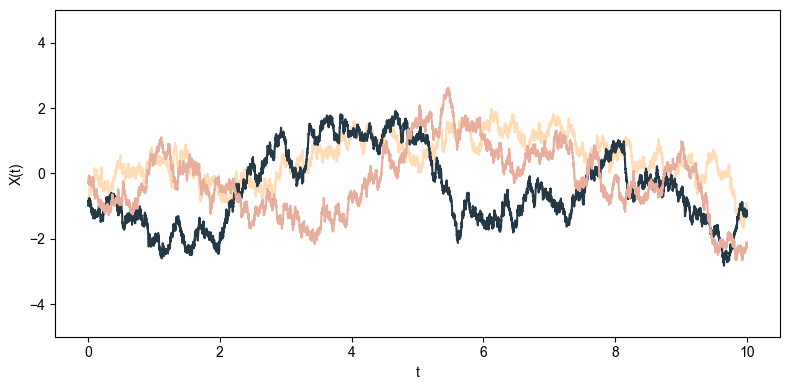

In [6]:

T = 10
dt = 0.001
samples = 3
res = p.ornstein_uhlenbeck(T,dt=dt, samples = samples,initial_condition="stationary")

t = res["t"]
X = res["X"]

fig,ax = plt.subplots(figsize=[8,4])

for x in X:
    ax.plot(t,x)

plt.xlabel("t")
plt.ylabel("X(t)")
plt.ylim([-5,5])
plt.tight_layout()
plt.show()

#### Now we change timescale and standard deviation

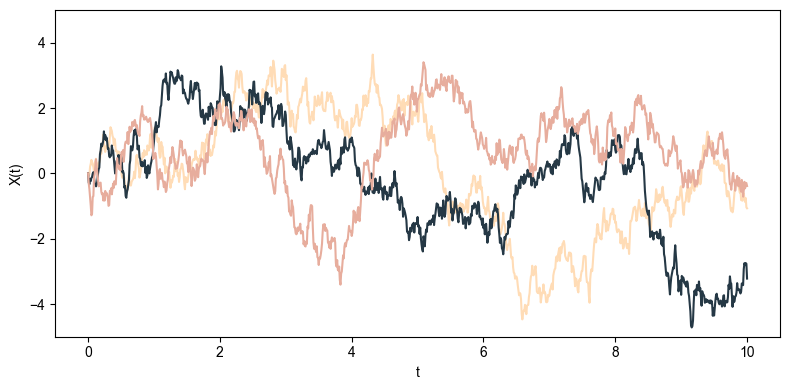

In [7]:
T = 10
dt = 0.001
gap = 10
samples = 3
stdev = 2
timescale = 2
res = p.ornstein_uhlenbeck(T,dt, samples = samples, stdev = stdev, timescale = timescale, gap = gap)

t = res["t"] 
X = res["X"]

fig,ax = plt.subplots(figsize=[8,4])

for x in X:
    ax.plot(t,x)
    
plt.xlabel("t")
plt.ylabel("X(t)")
plt.ylim([-5,5])
plt.tight_layout()
plt.show()

#### Now we choose stationary initial conditions

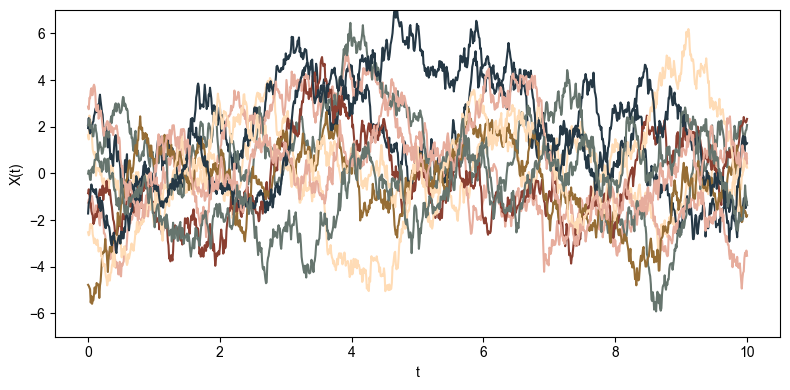

In [8]:
T = 10
dt = 0.001
gap = 10
samples = 10
stdev = 2
timescale = 1
ic = "stationary"
res = p.ornstein_uhlenbeck(T,dt=dt, samples = samples, stdev = stdev, 
                          timescale = timescale, gap = gap, initial_condition = ic)

t = res["t"]
X = res["X"]

fig,ax = plt.subplots(figsize=[8,4])

for x in X:
    ax.plot(t,x)
    
plt.xlabel("t")
plt.ylabel("X(t)")
plt.ylim([-7,7])
plt.tight_layout()
plt.show()

## Multivariate Ornstein-Uhlenbeck Process

The multivariate Ornstein Uhlenbeck process is defined by the differential

$$d X_n=-\theta_n X_n dt+\sigma_n d W_n $$

where $n=1,...,N$ are components of the process, $d W_n$ are individual differentials of Wiener processes and for each dimension we have a pair of parameters $(\theta_n,\sigma_n)$ or, alternativly, we can specify the pairs $(v_n,\tau_n)$) in this form of the process:

$$\tau_n d X_n=- X_n dt+\sqrt{2\tau_n v_n^2}d W_n $$


For multi-variate Ornstein Uhlenbeck Processes one has to specify the covariance structure of the Wiener increments

$$\left<\Delta W_n(t_i)\Delta W_m(t_j)\right>=S_{nm}\delta_{ij}$$

The matrix $\mathbf S $ contains the covariance of the increments. By default it is equal to the identity matrix, so the dimensions are uncorrelated.

You can check the options for the function `wiener()` and the examples in the notebook `WienerProcess.ipynb`.


#### Here's a simple example, with all dimensions having the same properties and no covariance

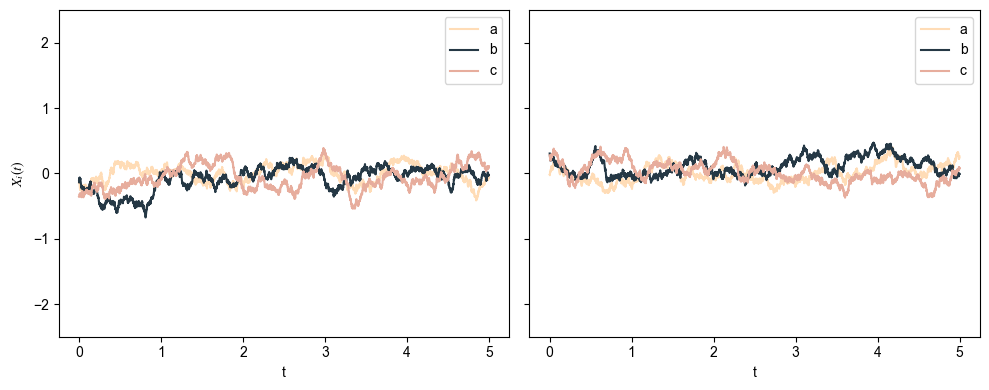

In [9]:
T = 5
dt = 0.001
samples = 2
gap = 10
N = 3
timescale = 0.5
stdev = 0.2

res = p.ornstein_uhlenbeck(T,dt,timescale=timescale, stdev=stdev, 
                          samples=samples,initial_condition='stationary',N=N)


t = res["t"]
X = res["X"]

fig, ax = plt.subplots(1,samples,figsize=[10,4],sharey=True)
for i, x in enumerate(X):    
    ax[i].plot(t,x)
    ax[i].set_xlabel("t")
    ax[i].set_ylim([-2.5,2.5])
    ax[i].legend(["a","b","c","d"])
ax[0].set_ylabel("$X_i(t)$")
plt.tight_layout()
plt.show()

#### Here we chose different timescales and standard deviations for the individual components of a 2-d process

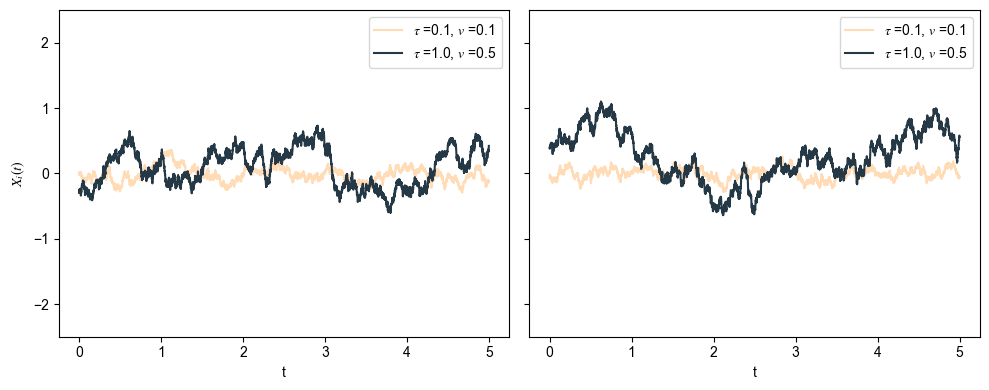

In [10]:
T = 5
dt = 0.001
samples = 2
gap = 10
N = 2
timescale = np.array([0.1,1])
stdev = np.array([0.1,0.5])

res = p.ornstein_uhlenbeck(T,dt,timescale=timescale, stdev=stdev, 
                          samples=samples,initial_condition='stationary',N=N)

t= res["t"]
X= res["X"]

leg=[r"$\tau$ ="+f'{x:.1f}'+r", $v$ ="+f'{y:.1f}' for (x,y) in zip(res["timescale"],res["stdev"])]

fig, ax = plt.subplots(1,samples,figsize=[10,4],sharey=True)
for i, x in enumerate(X):    
    ax[i].plot(t,x)
    ax[i].set_xlabel("t")
    ax[i].set_ylim([-2.5,2.5])
    ax[i].legend(leg)
ax[0].set_ylabel("$X_i(t)$") 
       
        
plt.tight_layout()
plt.show()

#### Similar example, except we specify the parameters $\theta$ and $\sigma$ for each component

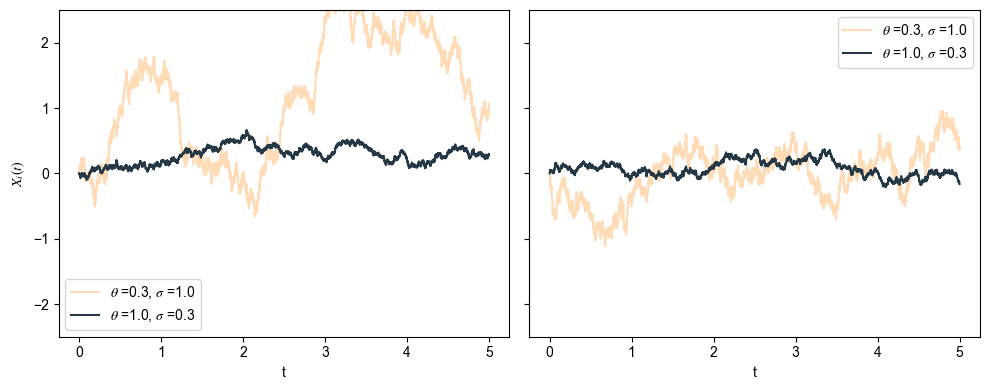

In [11]:
T = 5
dt = 0.001
samples = 2
gap = 10
N = 2
theta = np.array([0.3,1])
sigma = np.array([1,.3])

res = p.ornstein_uhlenbeck(T,dt,sigma=sigma,theta=theta,samples=samples,N=N)

t= res["t"]
X= res["X"]

leg=[r"$\theta$ ="+f'{x:.1f}'+r", $\sigma$ ="+f'{y:.1f}' for (x,y) in zip(res["theta"],res["sigma"])]

fig, ax = plt.subplots(1,samples,figsize=[10,4],sharey=True)
for i, x in enumerate(X):    
    ax[i].plot(t,x)
    ax[i].set_xlabel("t")
    ax[i].set_ylim([-2.5,2.5])
    ax[i].legend(leg)
ax[0].set_ylabel("$X_i(t)$") 
       
        
plt.tight_layout()
plt.show()

### Covariance

We can also generate non-trivially covariant OUPs, like we did in the case of the Wiener process by either specifying a covariance matrix $\mathbf{S}$ directly, or a mixing matrix $\mathbf{A}$.

**Note that these matrices specify the covariance of the Wiener increments in the noise term, not the OUP directly.**

In the dictionary the function returns, the noise covariance is returned, you can access it with the key `noise_covariance`.

Let's do the example we described above for the Wiener processes, where we took two independent Wiener increments, let's call them $dU_1$ and $dU_2$ as as basis and used a mixing structure like this:

$$ dW_n(t)=\cos(\alpha_n)dU_1(t)+\sin(\alpha_n)dU_2(t) $$

with 

1. $\alpha_1=0$
2. $\alpha_2=\pi/2$
3. $\alpha_3=\pi/6$
4. $\alpha_3=\pi$

for the Wiener increments in the 4 dimensional OUP:

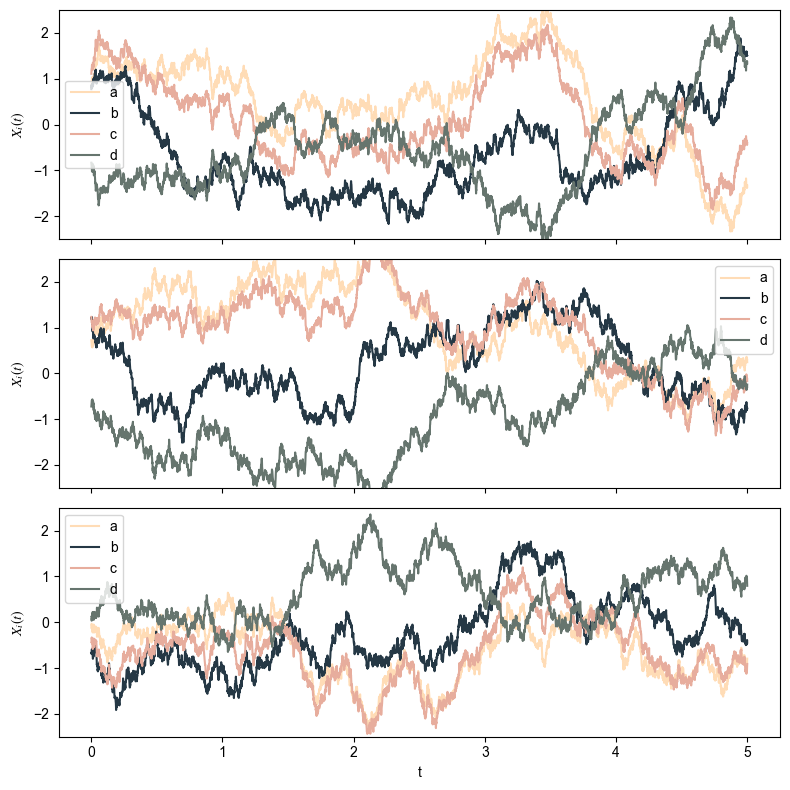

In [12]:
T = 5
dt = 0.001
samples = 3

A = np.array([[np.cos(x),np.sin(x)] for x in [0,np.pi/2,np.pi/6,np.pi]]);

res = p.ornstein_uhlenbeck(T,dt,N=4,mixing_matrix=A,samples=samples,initial_condition='stationary')

t = res["t"]
X = res["X"]
fig, ax = plt.subplots(samples,1,figsize=[8,8],sharex=True)

for i,x in enumerate(X):
    ax[i].plot(t,x)        
    ax[i].set_ylabel("$X_i(t)$")
    ax[i].set_ylim([-2.5,2.5])
    ax[i].legend(["a","b","c","d"])
ax[-1].set_xlabel("t")
plt.tight_layout()
plt.show()

You can see that realizations **a** and **d** are exactly anticorrelated and **a** and **c** are strongly (positively) correlated

## Limiting case Wiener Process

When $\theta=0$ the OUP becomes a Wiener Process. Note that you can not set $\theta=0$ and initialize the system with

`initial_conditions="stationary"`

because the Wiener Process isn't stationary. duh.

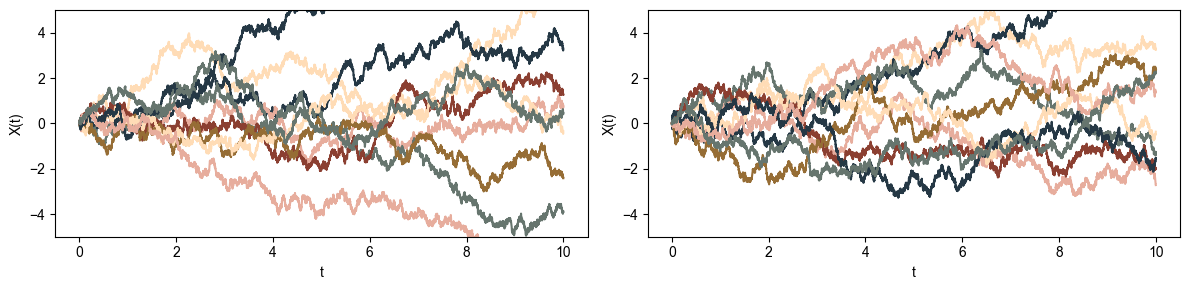

In [13]:
T = 10
dt = 0.001
samples = 10
yl = [-5,5]

oup = p.ornstein_uhlenbeck(T,dt, samples = samples,theta=0)
wie = p.wiener(T,dt, samples = samples)

fig,ax = plt.subplots(1,2,figsize=[12,3])
for x in oup["X"]:
    ax[0].plot(oup["t"],x)
    ax[0].set_xlabel("t")
    ax[0].set_ylabel("X(t)")
    ax[0].set_ylim(yl)
    
for x in wie["X"]:
    ax[1].plot(wie["t"],x)
    ax[1].set_xlabel("t")
    ax[1].set_ylabel("X(t)")
    ax[1].set_ylim(yl)
    
fig.tight_layout()
